# Librerías

In [478]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Obtención de datos

In [479]:
df = pd.read_csv('winequality-red.csv', delimiter=';')

In [480]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [481]:
X = df.iloc[:, :-1]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [482]:
y = df.iloc[:, -1]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

# Normalización de datos
Podemos tener mejor optimización en los
entrenamientos

In [483]:
from sklearn.preprocessing import MinMaxScaler

In [484]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

# Obtención de datos de entrenamiento y de prueba

In [485]:
from sklearn.model_selection import train_test_split

In [486]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=60)

# Logistic Regression

### Entrenamiento

In [487]:
from sklearn.linear_model import LogisticRegression

In [488]:
model = LogisticRegression(C = 10 ** 10, max_iter = 5000)
model.fit(X_train, y_train)

LogisticRegression(C=10000000000, max_iter=5000)

### Verificación

In [489]:
y_predicted = model.predict(X_test)
y_predicted[10:30]

array([6, 6, 5, 6, 6, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5],
      dtype=int64)

In [490]:
y_test[10:30].values.reshape(1, -1)

array([[6, 6, 6, 6, 6, 7, 7, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6]],
      dtype=int64)

In [491]:
(y_test[10:30].values.reshape(1, -1) == y_predicted[10:30]).astype(int)

array([[1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0]])

In [492]:
model.score(X_test, y_test)

0.621875

### Resultados de las métricas

In [493]:
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score


In [494]:
cm = multilabel_confusion_matrix(y_test, y_predicted)
print(cm)

[[[318   0]
  [  2   0]]

 [[308   1]
  [ 11   0]]

 [[141  53]
  [ 31  95]]

 [[132  58]
  [ 44  86]]

 [[263   9]
  [ 30  18]]

 [[317   0]
  [  3   0]]]


In [495]:
precision_score(y_test, y_predicted, average = None)

C:\Users\jeres\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.        , 0.64189189, 0.59722222, 0.66666667,
       0.        ])

In [496]:
recall_score(y_test, y_predicted, average = None)

array([0.        , 0.        , 0.75396825, 0.66153846, 0.375     ,
       0.        ])

In [497]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

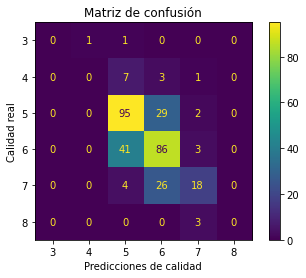

In [498]:
matrix = confusion_matrix(y_test, y_predicted)
matrixDisplay = ConfusionMatrixDisplay(matrix, display_labels=['3', '4', '5','6', '7', '8'])
matrixDisplay.plot()
matrixDisplay.ax_.set(title='Matriz de confusión', xlabel='Predicciones de calidad', ylabel='Calidad real')
plt.show()

In [499]:
from sklearn.metrics import r2_score

In [500]:
r2_score(y_test, y_predicted)

0.2664359861591695

# Linear Regression

### Entrenamiento

In [501]:
from sklearn.linear_model import LinearRegression

In [502]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Verificación

In [503]:
y_predicted = np.rint(model.predict(X_test))
y_predicted[10:30]

array([6., 5., 5., 6., 6., 7., 6., 6., 5., 6., 5., 5., 5., 5., 5., 6., 5.,
       6., 5., 6.])

In [504]:
y_test[10:30].values.reshape(1, -1)

array([[6, 6, 6, 6, 6, 7, 7, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6]],
      dtype=int64)

In [505]:
(y_test[10:30].values.reshape(1, -1) == y_predicted[10:30]).astype(int)

array([[1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1]])

In [506]:
model.score(X_test, y_test)

0.38011169247464005

### Resultados de las métricas

In [507]:
multilabel_confusion_matrix(y_test, y_predicted)

array([[[318,   0],
        [  2,   0]],

       [[308,   1],
        [ 11,   0]],

       [[149,  45],
        [ 36,  90]],

       [[121,  69],
        [ 36,  94]],

       [[265,   7],
        [ 35,  13]],

       [[316,   1],
        [  3,   0]]], dtype=int64)

In [508]:
precision_score(y_test, y_predicted, average = None)

C:\Users\jeres\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.        , 0.66666667, 0.57668712, 0.65      ,
       0.        ])

In [509]:
recall_score(y_test, y_predicted, average = None)

array([0.        , 0.        , 0.71428571, 0.72307692, 0.27083333,
       0.        ])

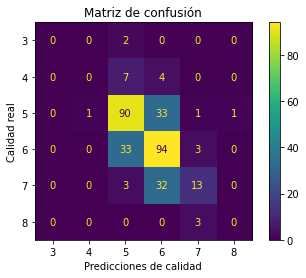

In [510]:
matrix = confusion_matrix(y_test, y_predicted)
matrixDisplay = ConfusionMatrixDisplay(matrix, display_labels=['3', '4', '5','6', '7', '8'])
matrixDisplay.plot()
matrixDisplay.ax_.set(title='Matriz de confusión', xlabel='Predicciones de calidad', ylabel='Calidad real')
plt.show()

In [511]:
r2_score(y_test, y_predicted)

0.25720876585928487